Problem 1: Weather Prediction Model
Consider a simple weather model with three states:
Sunny (S), Cloudy (C), Rainy (R).
The transition probability matrix is given by:
P =
[
[
0.7 0.2 0.1],[
0.3 0.4 0.3],[
0.2 0.3 0.5
]
]
1. Generate a sample path. Simulate and plot the weather over n = 365 days, starting
from an initial distribution (e.g., start with Sunny on Day 1, i.e., π(1) = [1 0 0]).
2. Empirical long term distribution. Starting with the initial distribution π(1) = [1 0 0],
estimate the empirical long-term fraction of Sunny, Cloudy, and Rainy days based on
your simulation. (Generate 106 sample paths of n = 25 days and compute the empirical
relative frequency of the various states on the 25th day).
3. Stationary Distribution. Compute the stationary distribution π by solving
πP = π,
X3
i=1
πi = 1.
4. Comparison of empirical and theoretical long term behaviour.
Find the least number of days (n) for which the empirical distribution converges (the
absolute error is < 10−10) to the theoretical stationary distribution.
5. Repeat for different initial distributions. Repeat steps 2 to 4 with the initial distributions
π(1) = [ 1
3
1
3
1
3 ] and π(1) = [0.5 0.25 0.25].

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
states = ["Sunny" , "Cloudy" , "Rainy"]
P = np.array([[0.7,0.2,0.1],[0.3,0.4,0.3],[0.2,0.3,0.5]])


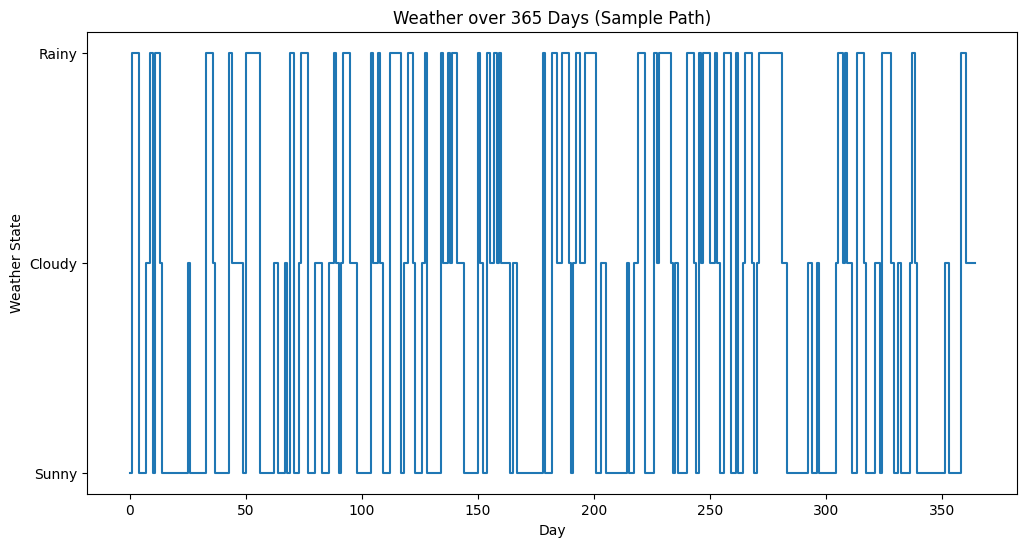

In [3]:
# 1. Generate a sample path.

def generate_sample_path(P , n_days , initial_state=0):
  path = [initial_state]
  for _ in range(n_days-1):
    current_state = path[-1]
    next_state = np.random.choice([0,1,2],p=P[current_state])
    path.append(next_state)

  return np.array(path)

np.random.seed(42)
sample_path = generate_sample_path(P , 365 , initial_state=0)

# Plot the weather path

plt.figure(figsize=(12,6))
plt.plot(sample_path,drawstyle='steps-pre')
plt.yticks([0,1,2],states)
plt.xlabel("Day")
plt.ylabel("Weather State")
plt.title("Weather over 365 Days (Sample Path)")
plt.show()


In [10]:
# 2. Empirical long term distribution.

def empirical_long_term_distribution(P , n_paths , n_days , initial_dist):
  counts = np.zeros(3)
  for _ in range(n_paths):
    # sample initial state according to initial distribution
    state = np.random.choice([0,1,2],p=initial_dist)
    for _ in range(n_days-1):
      state = np.random.choice([0,1,2],p=P[state])
    counts[state]+=1

  return counts/n_paths


empirical_dist = empirical_long_term_distribution(P, n_paths=1000, n_days=25, initial_dist=[1, 0, 0]) # Tweak n_paths to 10^6 (slow)
print("Empirical Distribution at Day 25 (π(1)=[1,0,0]):", empirical_dist)

Empirical Distribution at Day 25 (π(1)=[1,0,0]): [0.444 0.308 0.248]


In [9]:
# 3. Stationary Distribution

def stationary_distribution(p):
  eigen_values , eigen_vectors = np.linalg.eig(P.T)
  stationary = eigen_vectors[:,np.isclose(eigen_values,1)]
  stationary = stationary[:,0]
  stationary = stationary / stationary.sum()
  return np.real(stationary)


pi_stationary = stationary_distribution(P)
print("Stationary Distribution:", pi_stationary)

Stationary Distribution: [0.45652174 0.2826087  0.26086957]


In [12]:
# 4. Comparison of empirical and theoretical long term behaviour

def convergence_days(P , initial_dist , tolerance=1e-10 , max_days=1000):
  dist = np.array(initial_dist)
  for n in range(1,max_days+1):
    dist = dist @ P
    if np.all(np.abs(dist - pi_stationary) < tolerance):
      return n , dist

  return None , dist


n_conv , dist_conv = convergence_days(P , [1,0,0])
print("Convergence day (π(1)=[1,0,0]):", n_conv)


Convergence day (π(1)=[1,0,0]): 30


In [13]:
# 5. Repeat for different initial distributions.

initial_dists = {
"[1,0,0]": [1, 0, 0],
"[1/3,1/3,1/3]": [1/3, 1/3, 1/3],
"[0.5,0.25,0.25]": [0.5, 0.25, 0.25]
}


for name, init in initial_dists.items():
  emp = empirical_long_term_distribution(P, n_paths=1000, n_days=25, initial_dist=init) # tweak n_paths as required maybe to 10^6 as per question
  n_conv, dist_conv = convergence_days(P, init)
  print(f"\nInitial Distribution {name}:")
  print(" Empirical (Day 25):", emp)
  print(" Converges by Day:", n_conv)
  print(" Distribution at Convergence:", dist_conv)


Initial Distribution [1,0,0]:
 Empirical (Day 25): [0.431 0.29  0.279]
 Converges by Day: 30
 Distribution at Convergence: [0.45652174 0.2826087  0.26086957]

Initial Distribution [1/3,1/3,1/3]:
 Empirical (Day 25): [0.44  0.285 0.275]
 Converges by Day: 28
 Distribution at Convergence: [0.45652174 0.2826087  0.26086957]

Initial Distribution [0.5,0.25,0.25]:
 Empirical (Day 25): [0.477 0.276 0.247]
 Converges by Day: 27
 Distribution at Convergence: [0.45652174 0.2826087  0.26086957]
